In [1]:
## CAUTION: this packet is mandatory for Twint working ##

import nest_asyncio
nest_asyncio.apply()

# rest of the code
import twint
import pandas as pd
import preprocessor as p
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thibaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tweet Scrapping 

In [47]:
def tweet_scrap(movie_name):
    
    c = twint.Config()
    #c.Username = "apple"
    c.Search =  "#{}".format(movie_name)
    #c.Search =  "#Mandalorien"
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Lang = "en"
    c.Limit = 40
    c.Store_csv = True 
    ## Custom the output ##
    c.Custom["Tweet"] = ["tweet"]
    #c.Custom["Date"] = ["date"]

    c.Output = "{}.csv".format(movie_name)
    #c.Pandas = True
    twint.run.Search(c)

In [3]:
#movie_name = "Mandalorien"
#tweet_scrap(movie_name)

In [4]:
#df_tweet = pd.read_csv("twitter.csv") 

In [5]:
#df_tweet

## Tweet cleaning - Preprocess 

In [6]:
def Clean(dataframe):
    #Remove non ASCII characters:
    dataframe = dataframe.encode('ascii','ignore')
    dataframe = dataframe.decode('utf8')
    
    #Remove URLs : 
    dataframe = re.sub('http\S+\s*','',dataframe)  
    
    
    #removing mentions:
    dataframe = re.sub('rt|cc','',dataframe) #Remove RT and cc
    dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
    
    dataframe = dataframe.lower() #Converting to lowercase
    #dataframe = re.sub(r'\d+', '', dataframe) #Removing numbers
    dataframe = re.sub(r'[^a-zA-Z0-9\s]', '', dataframe) #Removing punctuations
    dataframe = dataframe.strip() #remove white spaces
    dataframe = re.sub('pictw\S+\s*','',dataframe)
    
    #Tokenize: 
    word_tokens = word_tokenize(dataframe)
    
    #Words stops
    stop_words=set(stopwords.words('english'))

    filtered_tweet = []
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
     
    return ' '.join(filtered_tweet)

In [7]:
#df_tweet_clean = df_tweet['tweet'].apply(Clean)
#preproctest(df_tweet)

## Sentiment  Prediction with TextBlob

In [37]:
from textblob import TextBlob
from IPython.display import Markdown, display
# Pretty printing the result
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
def Senti_Blob(df_tweet_clean):
    
    senti_blob = []
    for tweet in df_tweet_clean:
        #print(tweet)
        analysis = TextBlob(tweet)
        #print(analysis.sentiment)
        #senti.append(analysis.sentiment)
        if analysis.sentiment[0]>0:
            #printmd('Positive', color="green")
            senti_blob.append('positive')
        elif analysis.sentiment[0]<0:
            #printmd('Negative', color="red")
            senti_blob.append('negative')
        else:
            #printmd("Neutre", color="grey")
            senti_blob.append('neutre')
            #print("")

    File_sentiblob = {'Tweet': df_tweet_clean,
            'Sentiment': senti_blob,
           }

    df_sentiblob = pd.DataFrame(File_sentiblob, columns= ['Tweet', 'Sentiment'])
    
    return df_sentiblob

In [38]:
#df_tweet['tweet'].count()

In [39]:
#File_sentiblob = {'Tweet': df_tweet_clean,
#            'Sentiment': senti_blob,
#           }

#df_sentiblob = pd.DataFrame(File, columns= ['Tweet', 'Sentiment'])
#df_sentiblob   

## Predicted Emotion Analyses  

In [40]:
#df_sentiblob.count()

In [41]:
#sns.countplot(x='Sentiment',data=df_sentiblob)

In [42]:
#count_sentiblob = df_sentiblob.groupby("Sentiment", sort='count').size().reset_index(name='count')
#print('\n Sentiment with Sentiblob: \n\n', count_sentiblob)

# API

In [68]:
def Api(movie_name):
    tweet_scrap(movie_name)
    df_tweet = pd.read_csv("{}.csv".format(movie_name))
    df_tweet_clean = df_tweet['tweet'].apply(Clean)
    #Senti_Blob(df_tweet_clean)
    df_sentiment_blob = Senti_Blob(df_tweet_clean)
    print('\n \n')
    print(df_sentiment_blob)
    
    count_senti = df_sentiment_blob.count()
    print('\n \n')
    print('Total number of tweet: \n',count_senti)
    
    sns.countplot(x='Sentiment',data=df_sentiment_blob)
    
    count_sentiblob = df_sentiment_blob.groupby("Sentiment", sort='count').size().reset_index(name='count')
    print('\n Sentiment with Sentiblob: \n\n', count_sentiblob)
    
    ## Pourcentage 
    
    nb_tot = df_sentiment_blob['Sentiment'].shape[0]
    positive_sentiblob = list(df_sentiment_blob['Sentiment']).count('positive')
    negative_sentiblob = list(df_sentiment_blob['Sentiment']).count('negative')
    neutral_sentiblob = list(df_sentiment_blob['Sentiment']).count('neutre')

    print('\n percent of positive:', (positive_sentiblob/nb_tot)*100)
    print( '\n percent of negative:', (negative_sentiblob/nb_tot)*100)
    print('\n percent of neutre:', (neutral_sentiblob/nb_tot)*100)
    
    

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)


Username: Ankur42887396 |  Tweet: I was expecting this when he says that 😅😅😅😅😅 Would have been very cool .... Source ironman_kyne25  #mcu #marvel #endgame #avengers #avengersendgame #chrisevans #robertdowneyjr #chrishemsworth #allaboutmarvel00…  https://www.instagram.com/p/B6BD5tml00L/?igshid=1he0zpun1hmna …
Username: MisterBabamook |  Tweet: Think it's time to bin this and swap it up for something else. #Banner #AvengersEndgame #avengersinfinitywar #Avengers pic.twitter.com/LLoHlQHpdB
Username: Shouto_Peter |  Tweet: Now I don't know about you, but I'm soft for mentor apprentice/ parental and child figure relationships in the shows I watch  #maleficentmistressofevil #AvengersEndgame #BokuNoHeroAcademia #owarinoseraph pic.twitter.com/NFxuDlVfwD
Username: Cinemaniac94 |  Tweet: As a writer I love watching movies while reading the script side by side. It really gets the creative juices flowing and its pretty cool to see someone's vision on screen. Highly recommend for script writers and 

Username: OnePerfectShot |  Tweet: AVENGERS: INFINITY WAR (2018)  Cinematography by Trent Opaloch Directed by @Russo_Brothers  We charted the entire path to #AvengersEndgame -- read our entry on this one here:  http://bit.ly/2siKuqZ  pic.twitter.com/7yyrw7DkXG
Username: comicsrogue7 |  Tweet: 🔥🔥 #ForSALE:  #OnSALE! RARE #GuardiansOftheGalaxy #2 (2013) | 1:150 #JoeQuesada SKETCH #VARIANT! #Guardians3 #GuardiansOftheGalaxy3 #MarvelComics #RocketRaccoon #ComicBooks #AvengersEndgame #Comics #Avengers #OnSaleNOW! http://www.ebay.com/itm/163964678777 …
Username: comicsrogue7 |  Tweet: 🔥🔥 #ForSALE:  #KEYIssue #MarvelComics' #X23 #7 2018 #MikeDeodato #Variant MINT! 1st #XAssassin! #ComicBooks #XMen #Wolverine #AvengersEndgame #XMen #GuardiansOftheGalaxy3 http://www.ebay.com/itm/163964704619 …
Username: RealityMarve1 |  Tweet: Captain Marvel / Carol Danvers | Avengers endgame   #CaptainMarvel #CarolDanvers #BrieLarson #Avengers #AvengersEndgame #Marvel #MarvelStudios #Thor #CaptainAmerica #Iron


 Sentiment with Sentiblob: 

   Sentiment  count
0  negative      5
1    neutre     25
2  positive     26

 percent of positive: 46.42857142857143

 percent of negative: 8.928571428571429

 percent of neutre: 44.642857142857146


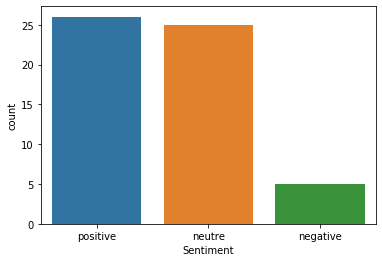

In [70]:
#movie_name = "Mandalorien"
movie_name = "avengersendgame"
#movie_name = "peakyblinders"
Api(movie_name)